In [1]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import shap
import functions as feature
import pandas as pd


In [90]:
#import titanic dataset
data = pd.read_csv('datasets/titanic.csv')
y = data['survived']
X = data.drop(['survived'], axis=1)

In [2]:
#import weather dataset
data = pd.read_csv('datasets/weatherAUS.csv')
data = data.dropna(subset=['RainTomorrow']) #delete rows with NaN values in RainTommorrow

y = data['RainTomorrow']
#convert y from string to binary 
y = pd.to_numeric(y.replace({'No': '0', 'Yes': '1'}))


X = data.drop(['RainTomorrow'], axis=1)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [ ]:
#import heart dataset
data = pd.read_csv('datasets/heart.csv')
y = data['output']
X = data.drop(['output'], axis=1)
data

In [3]:
X = X.select_dtypes(include=[np.number]) #filter X to only include numeric columns
X = X.fillna(X.mean()) #fill NaN values with the mean of the column


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

X_train_means = X_train.mean().to_frame().T

COLUMNS = X_train.columns

nn = MLPClassifier(solver="adam", alpha=1e-1, hidden_layer_sizes=(10, 10, 10, 10), random_state=0, max_iter=1000)
nn.fit(X_train, y_train)

def print_accuracy(f):
    print(
        "Accuracy = {0}%".format(
            100 *
            np.mean(
                f(X_test) == y_test))
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

print_accuracy(nn.predict)

Accuracy = 83.9129364604944%


In [9]:
INDEX = 29
item = X_test.iloc[[INDEX]]
y_test[INDEX]

1

  0%|          | 0/1 [00:00<?, ?it/s]

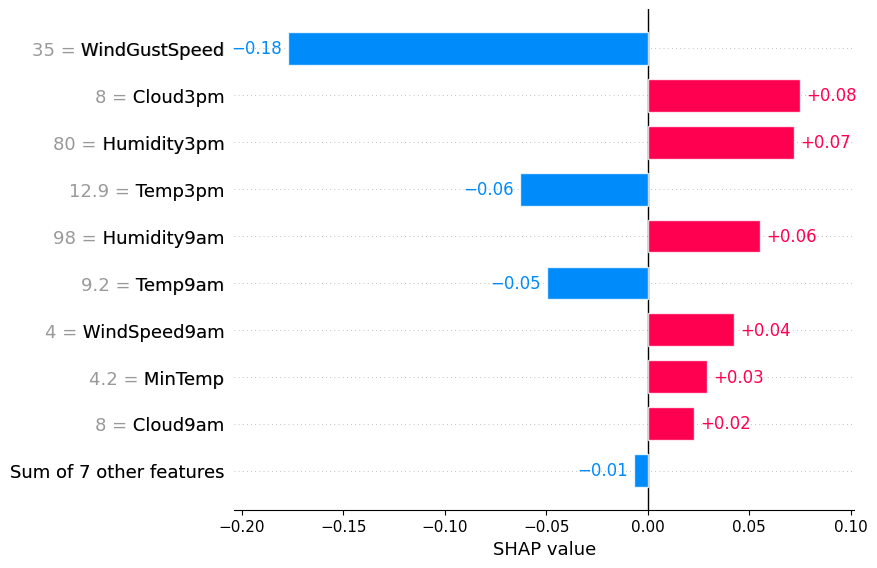

In [10]:
# select only first entry of X_test
shap_values = feature.calc_shap_values(item, X_train_means, nn, COLUMNS)
shap.plots.bar(shap_values[0])

  0%|          | 0/1 [00:00<?, ?it/s]

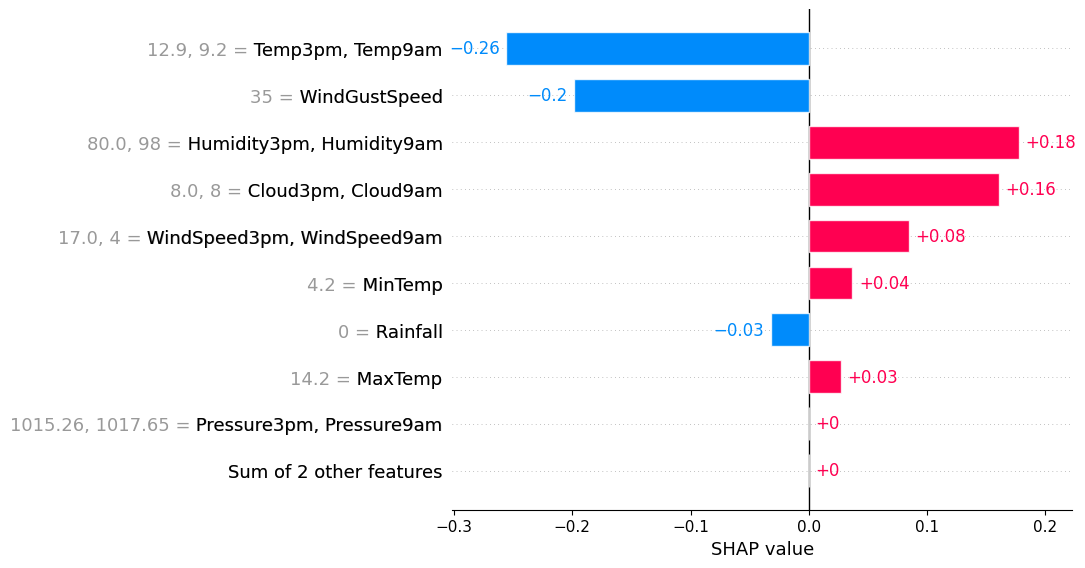

In [11]:
#entangle the named columns
#COL_LIST = [['Humidity3pm', 'Pressure3pm', 'Temp3pm', 'WindSpeed3pm', 'Cloud3pm'], ['Humidity9am', 'Pressure9am', 'Temp9am', 'WindSpeed9am', 'Cloud9am']]
COL_LIST = [['Temp3pm', 'Temp9am'], ['Humidity3pm', 'Humidity9am'], ['Pressure3pm', 'Pressure9am'], ['WindSpeed3pm', 'WindSpeed9am'], ['Cloud3pm', 'Cloud9am']]
shap_values = feature.calc_shap_values(item, X_train_means, nn, COLUMNS, COL_LIST)
shap.plots.bar(shap_values[0])

In [7]:
COLUMNS

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')